In [160]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas.util.testing as tm

import warnings
warnings.filterwarnings('ignore')

In [161]:
df_churn = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [162]:
df_churn.head(-10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,9281-CEDRU,Female,0,Yes,No,68,Yes,No,DSL,No,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),64.10,4326.25,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No


In [163]:
#df_churn.rename(columns= {0: 'CustomerID', 1: 'Gender', 5: 'Tenure'}, inplace = True)
#df_churn.head()

# EDA

I will start working on data preprocessing. 
I will discover features in the dataframe. Will find mssing values, correlation between features, visualise features for statistcal analysis and incode them. 

In [164]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [165]:
df_churn.shape

(7043, 21)

In [166]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Changing datatypes
We have a few features in the datset that have unapropriate data types. I will transform "TotalCharges" to float and "SeniorCitizen" to object

In [167]:
df_churn.TotalCharges = pd.to_numeric(df_churn.TotalCharges, errors='coerce') # coverting object to float
df_churn["TotalCharges"].dtype

dtype('float64')

In [168]:
df_churn["SeniorCitizen"] = df_churn["SeniorCitizen"].astype("object") 
df_churn["SeniorCitizen"].dtype

dtype('O')

In [169]:
df_churn.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [170]:
df_churn_med = df_churn["TotalCharges"].median()
print(df_churn_med)

1397.475


In [171]:
df_churn["TotalCharges"].replace(np.nan, df_churn_med, inplace = True )

In [172]:
df_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [173]:
df_churn.describe()
# we cann no see all the features as manuy of the are objects. I will include them in the next linr

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [174]:
df_churn.describe(include=object).T
#we can see all the features 

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088


### The observaton shows:
- We are working with 21 column and 7043 rows 


- Some of the features have unopropriate datatype

    SeniorCitizen ---> will be converted into object   
    TotalCharges ----> has converted into num
    
    
- We have 11 missing values in the column "TotalCharges "    
    ----> will be replaced with midean
    
    
- We are working with categorical values 


- We are dealing with skweed distributin in features like "MonthlyCharges",	"TotalCharges" and "tenure"

### Visualisation of Numerical features

# Correlation 
I will found a correlation between varanle in the datset. Is important to know which varaibles are corelated. It issential for the analysis. At tihis stage I think myself that for us could be important to have a look on features "Tenure", "MonthlyCharges" and "TotalCharges". 
I will found a correlation between varanle in the datset. Is important to know which varaibles are corelated. It issential for the analysis. 

When applied to an entire dataframe, the corr() function returns a dataframe of pair-wise correlation between the columns. We can see that there’s a weak negative correlation between scores of History and Maths/Physics. Also, notice that the values on the diagonal are 1s, this is because each column is perfectly correlated with itself.

Note that by default, the corr() function returns Pearson’s correlation. For more on the corr() function, refer to its documentation.

In [175]:
#df_churn.corr()

#correlation = df_churn.corr().round(2)
#plt.figure(figsize = (14,7))
#sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

In [176]:
#print("Correlation betwee ToatalCarge and Tenure: ", df_churn['TotalCharges'].corr(df_churn["tenure"]))
#print("Correlation betwee ToatalCarge and MonthlyCharges: ", df_churn['TotalCharges'].corr(df_churn["MonthlyCharges"]))

<AxesSubplot:xlabel='tenure'>

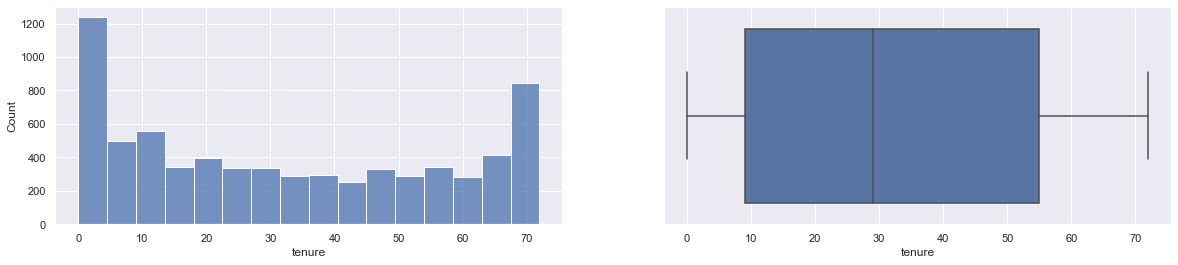

In [177]:
fig, ax = plt.subplots(1, 2,  figsize=(20,4))

sns.set(font_scale=1)

sns.histplot(x = 'tenure', data = df_churn, ax= ax[0])
sns.boxplot(x = 'tenure', data = df_churn, ax =ax[1])


<AxesSubplot:xlabel='MonthlyCharges'>

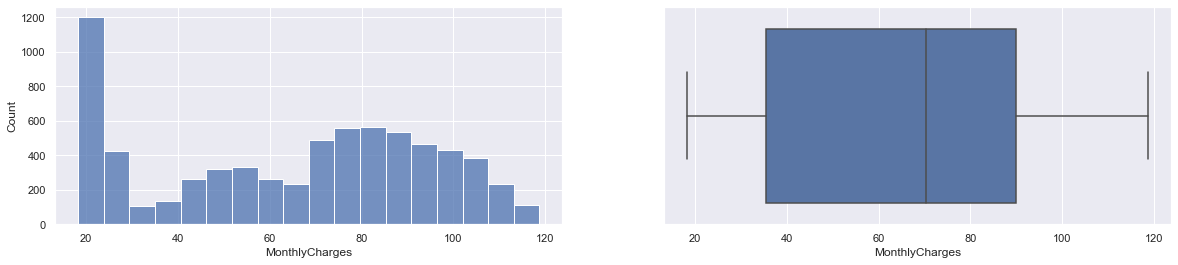

In [178]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
#fig, ax = plt.subplots(2, figsize=(10, 5))
sns.set(font_scale=1)

sns.histplot(x = 'MonthlyCharges', data = df_churn, ax= ax[0])
sns.boxplot(x = 'MonthlyCharges', data = df_churn, ax =ax[1])

<AxesSubplot:xlabel='TotalCharges'>

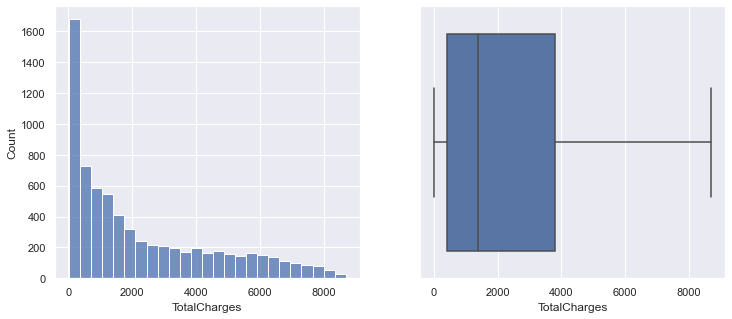

In [179]:
#fig, ax = plt.subplots(2, figsize=(10, 4))
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.set(font_scale=1)

sns.histplot(x = 'TotalCharges', data = df_churn, ax= ax[0])
sns.boxplot(x = 'TotalCharges', data = df_churn, ax =ax[1])

Observation of the feagures:
- From the feagures above we can see that many customers stay with the company less than 10 months, however theare are also customers who stay loyal to  the company around 73 months

- MonthlyCharges has the left skewed distribution. As we can see the majority of customers charged less than 25 dollars a months and the big proportion of the who are charged more than 25 dollars a month. 

- ToatallCharges has the right skewed distribution and is shows that the majority of the custoners charged less than 1500 dollars a year. Again we can display that the majority of the subscribers charged around more than 1500 dollars a year.

# Visualisation numerical features with Churn

<AxesSubplot:xlabel='tenure', ylabel='Count'>

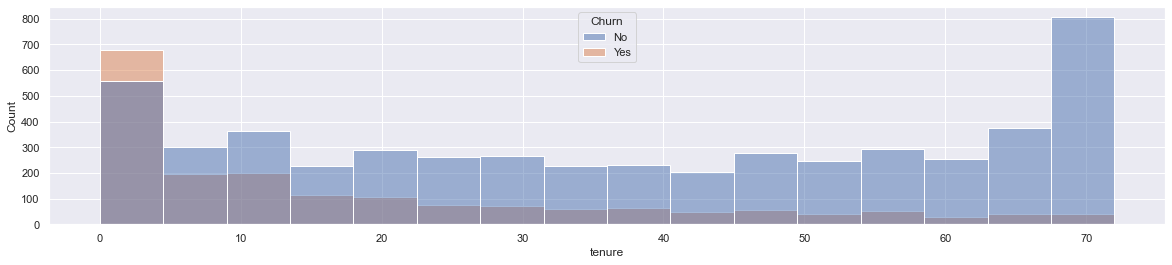

In [180]:
fig, ax = plt.subplots(figsize=(20,4))
sns.histplot(data = df_churn, x="tenure" , hue="Churn")

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

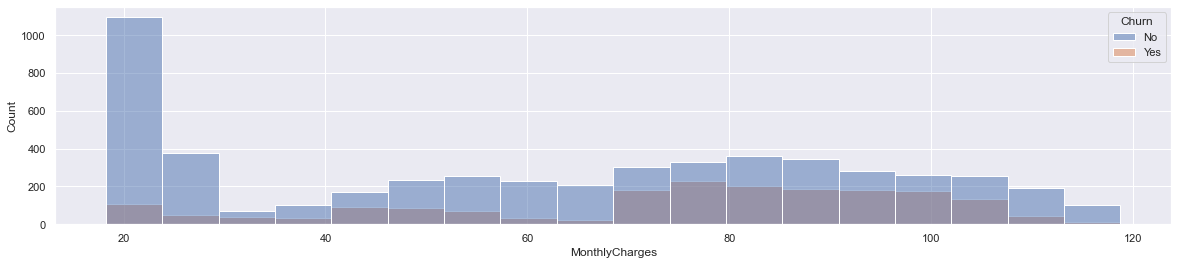

In [181]:
fig, ax = plt.subplots(1, figsize=(20,4))
sns.histplot(data = df_churn, x="MonthlyCharges" , hue="Churn")

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

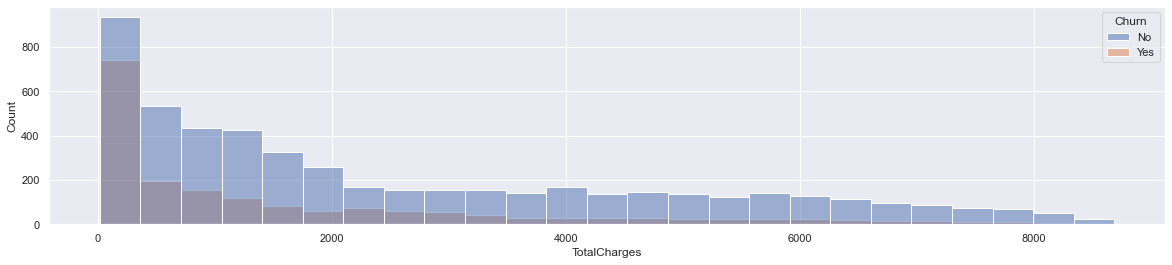

In [182]:
fig, ax = plt.subplots(figsize=(20,4))
sns.histplot(data = df_churn, x="TotalCharges" , hue="Churn")

### Observation of churn with numerical features 
Tenure and MonthlyCharge are critical features in the observation. 

From the visualisation, we can say that tenure has high churn where customer stays with the company for the short period of time. As longer customers tenure, less likely that the customer's cancellation of the subscription 

MonthlyCharge is a visualisation showing that cancellation of the product is more likely to appear if the customers are charged more than 65 dollars a month.

There is also an interesting observation that in ToatalCharge high churn is likely to appear at around 300 dollars a months 

# Visualisation of categorical features

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

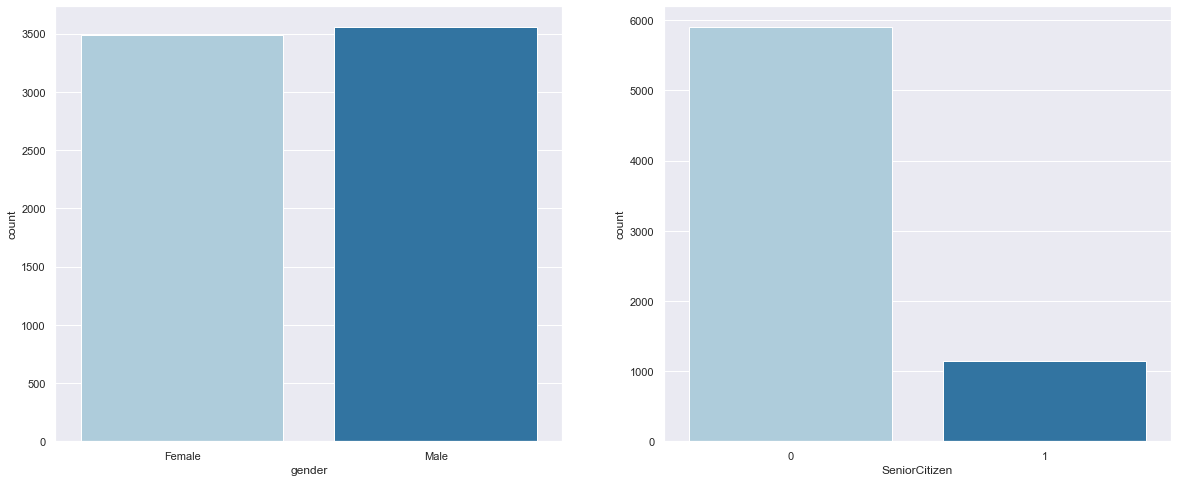

In [183]:
#https://towardsdatascience.com/4-simple-tips-for-plotting-multiple-graphs-in-python-38df2112965c

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

sns.countplot(x=df_churn["gender"], palette = "Paired",  ax=ax[0])

sns.countplot(x=df_churn["SeniorCitizen"], palette = "Paired", ax=ax[1])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

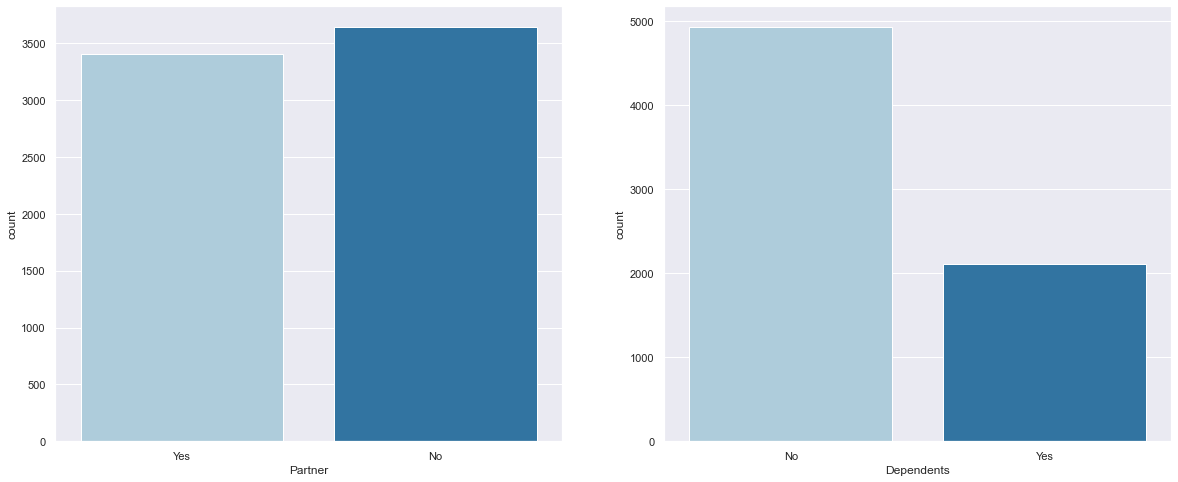

In [184]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

sns.countplot(x=df_churn["Partner"], palette = "Paired",  ax=ax[0])
sns.countplot(x=df_churn["Dependents"], palette = "Paired",  ax=ax[1])


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

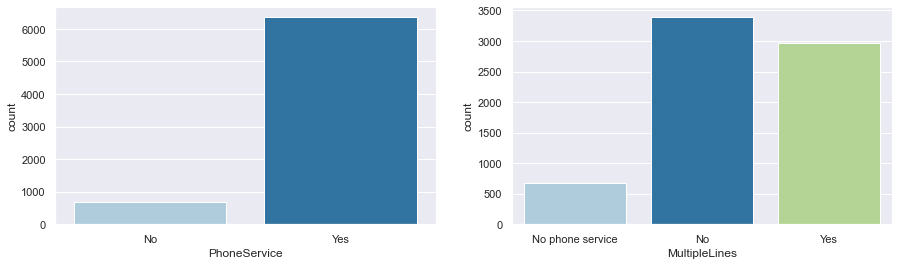

In [185]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

sns.countplot(x=df_churn["PhoneService"], palette = "Paired", ax=ax[0])
sns.countplot(x=df_churn["MultipleLines"], palette = "Paired", ax=ax[1])

<AxesSubplot:xlabel='InternetService', ylabel='count'>

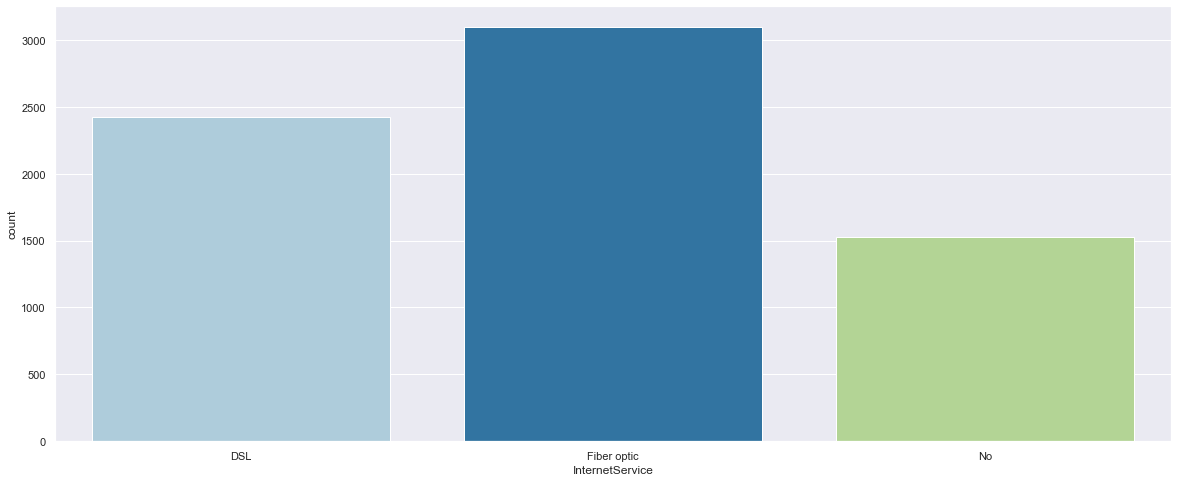

In [186]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,8))

sns.countplot(x=df_churn["InternetService"], palette = "Paired")

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

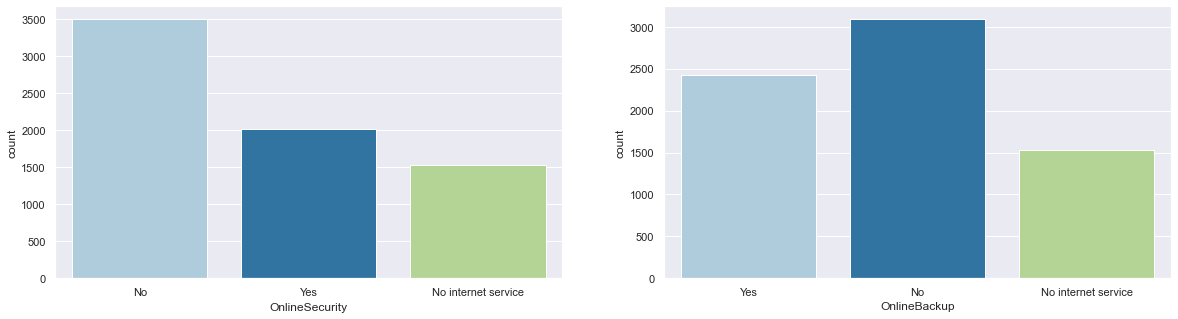

In [187]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.countplot(x=df_churn["OnlineSecurity"], palette = "Paired", ax = ax[0])
sns.countplot(x=df_churn["OnlineBackup"], palette = "Paired", ax = ax[1])

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

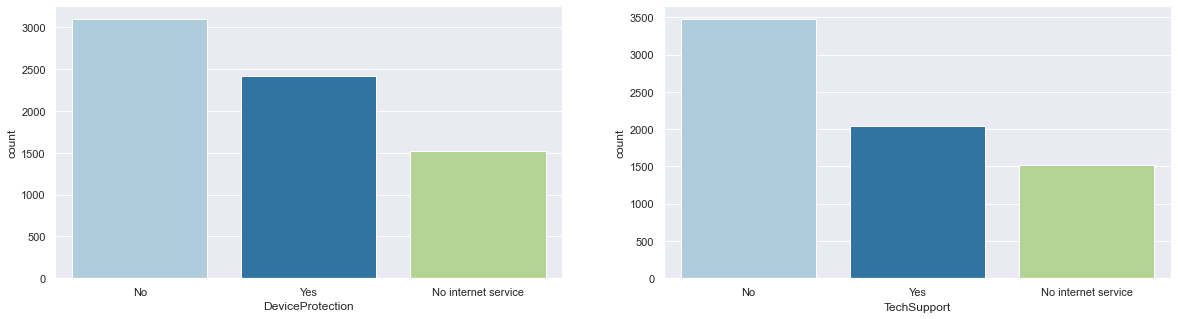

In [188]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.countplot(x=df_churn["DeviceProtection"], palette = "Paired", ax = ax[0])
sns.countplot(x=df_churn["TechSupport"], palette = "Paired", ax = ax[1])

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

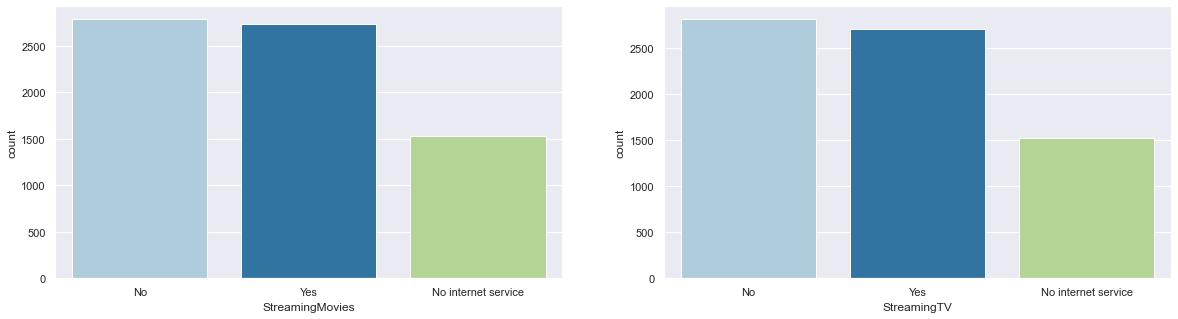

In [189]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.countplot(x=df_churn["StreamingMovies"], palette = "Paired", ax = ax[0])
sns.countplot(x=df_churn["StreamingTV"], palette = "Paired", ax = ax[1])


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

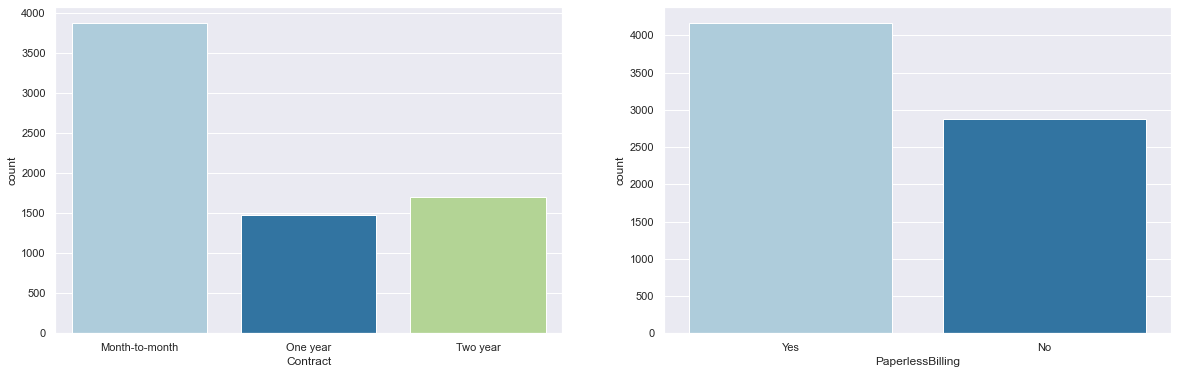

In [190]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

sns.countplot(x=df_churn['Contract'], palette = "Paired", ax = ax[0])
sns.countplot(x=df_churn['PaperlessBilling'], palette = "Paired", ax = ax[1])

<AxesSubplot:xlabel='Churn', ylabel='count'>

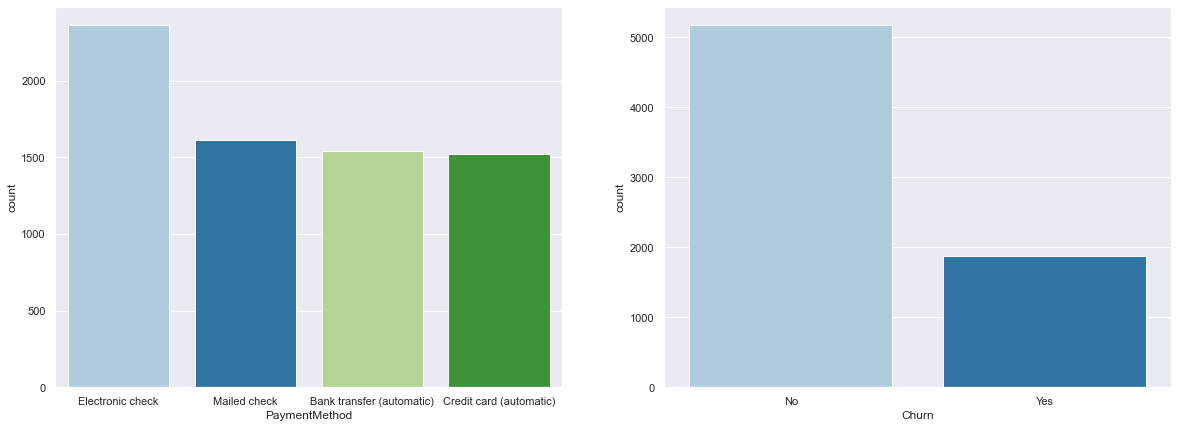

In [191]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

sns.countplot(x=df_churn['PaymentMethod'], palette = "Paired", ax = ax[0])
sns.countplot(x=df_churn['Churn'], palette = "Paired",ax = ax[1])

### Comparing the variable with the churn
I will make a comparation of all categorical variables with the churn. It will shows us some useful insights and it will helps us to see some paterns. 

Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603


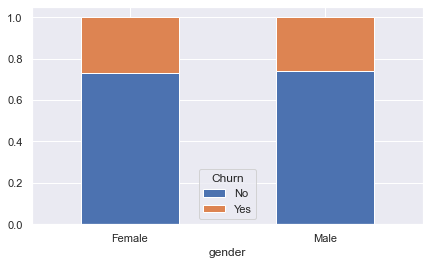

In [192]:
#https://thinkingneuron.com/how-to-visualize-the-relationship-between-two-categorical-variables-in-python/
CrosstabResult = pd.crosstab(index = df_churn['gender'], columns = df_churn['Churn'],
                          normalize ='index')

CrosstabResult.plot.bar(figsize = (7,4),
                    rot=0, stacked=True)

print(CrosstabResult)

Churn                No       Yes
SeniorCitizen                    
0              0.763938  0.236062
1              0.583187  0.416813


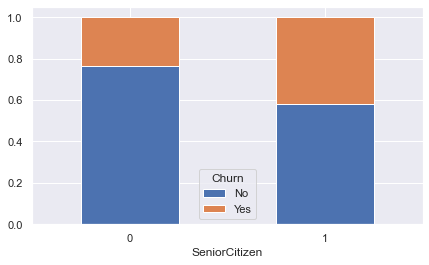

In [193]:
CrosstabResult = pd.crosstab(index = df_churn['SeniorCitizen'], columns = df_churn['Churn'],
                          normalize ='index')

CrosstabResult.plot.bar(figsize = (7,4),
                    rot=0, stacked=True)

print(CrosstabResult)


Churn          No       Yes
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649


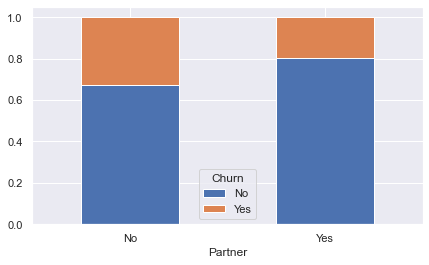

In [194]:
CrosstabResult = pd.crosstab(index = df_churn["Partner"], columns = df_churn['Churn'],
                          normalize ='index')

CrosstabResult.plot.bar(figsize = (7,4),
                    rot=0, stacked=True)

print(CrosstabResult)

Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502


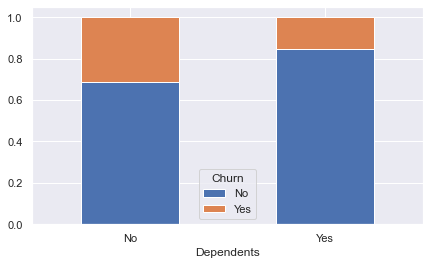

In [195]:
CrosstabResult = pd.crosstab(index = df_churn["Dependents"], columns = df_churn['Churn'],
                          normalize ='index')

CrosstabResult.plot.bar(figsize = (7,4),
                    rot=0, stacked=True)

print(CrosstabResult)

Churn               No       Yes
PhoneService                    
No            0.750733  0.249267
Yes           0.732904  0.267096


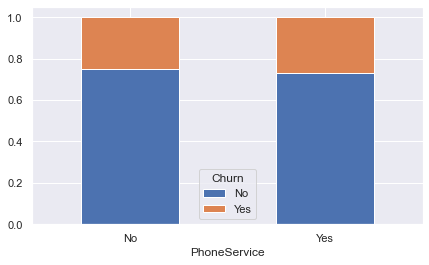

In [196]:
CrosstabResult = pd.crosstab(index = df_churn["PhoneService"], columns = df_churn['Churn'],
                          normalize ='index')

CrosstabResult.plot.bar(figsize = (7,4),
                    rot=0, stacked=True)

print(CrosstabResult)

Churn                   No       Yes
MultipleLines                       
No                0.749558  0.250442
No phone service  0.750733  0.249267
Yes               0.713901  0.286099


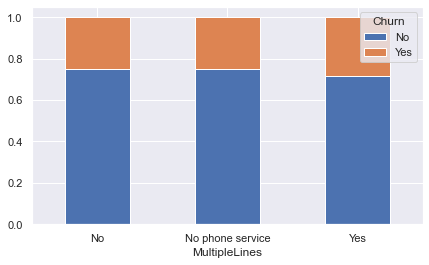

In [197]:
CrosstabResult = pd.crosstab(index = df_churn["MultipleLines"], columns = df_churn['Churn'],
                          normalize ='index')

CrosstabResult.plot.bar(figsize = (7,4),
                    rot=0, stacked=True)

print(CrosstabResult)

Churn                  No       Yes
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050


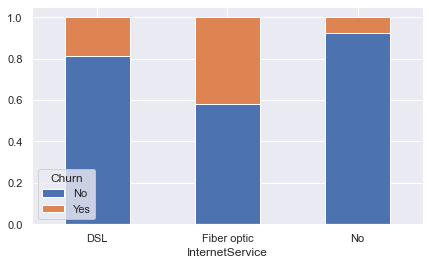

In [198]:
CrosstabResult = pd.crosstab(index = df_churn["InternetService"], columns = df_churn['Churn'], normalize ='index')
CrosstabResult.plot.bar(figsize = (7,4),
                    rot=0, stacked=True)
print(CrosstabResult)

Churn                      No       Yes
OnlineSecurity                         
No                   0.582333  0.417667
No internet service  0.925950  0.074050
Yes                  0.853888  0.146112


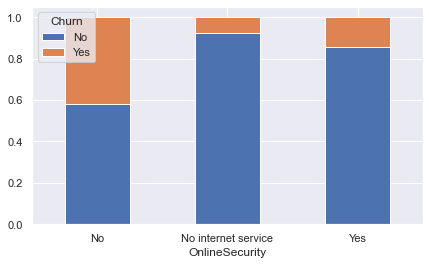

In [199]:
CrosstabResult = pd.crosstab(index = df_churn["OnlineSecurity"], columns = df_churn['Churn'],
                          normalize ='index')

CrosstabResult.plot.bar(figsize = (7,4),
                    rot=0, stacked=True)

print(CrosstabResult)

Churn                      No       Yes
OnlineBackup                           
No                   0.600712  0.399288
No internet service  0.925950  0.074050
Yes                  0.784685  0.215315


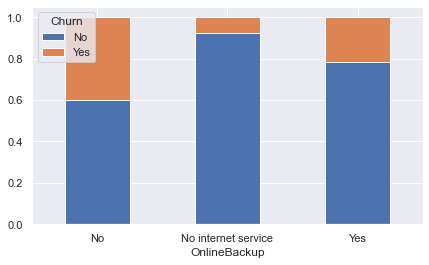

In [200]:
CrosstabResult = pd.crosstab(index = df_churn["OnlineBackup"], columns = df_churn['Churn'],
                          normalize ='index')

CrosstabResult.plot.bar(figsize = (7,4),
                    rot=0, stacked=True)

print(CrosstabResult)

Churn                      No       Yes
DeviceProtection                       
No                   0.608724  0.391276
No internet service  0.925950  0.074050
Yes                  0.774979  0.225021


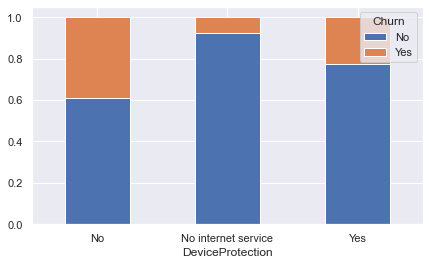

In [201]:
CrosstabResult = pd.crosstab(index = df_churn["DeviceProtection"], columns = df_churn['Churn'],
                          normalize ='index')

CrosstabResult.plot.bar(figsize = (7,4),
                    rot=0, stacked=True)

print(CrosstabResult)

Churn                      No       Yes
TechSupport                            
No                   0.583645  0.416355
No internet service  0.925950  0.074050
Yes                  0.848337  0.151663


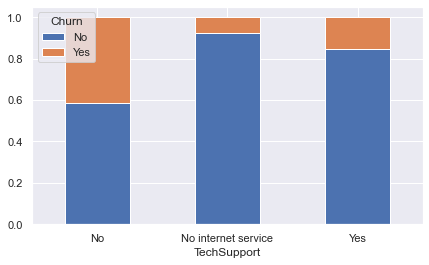

In [202]:
CrosstabResult = pd.crosstab(index = df_churn["TechSupport"], columns = df_churn['Churn'],
                          normalize ='index')

CrosstabResult.plot.bar(figsize = (7,4),
                    rot=0, stacked=True)

print(CrosstabResult)

Churn                      No       Yes
StreamingMovies                        
No                   0.663196  0.336804
No internet service  0.925950  0.074050
Yes                  0.700586  0.299414


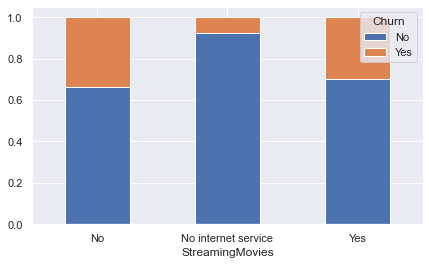

In [203]:
CrosstabResult = pd.crosstab(index = df_churn["StreamingMovies"], columns = df_churn['Churn'],
                          normalize ='index')

CrosstabResult.plot.bar(figsize = (7,4),
                    rot=0, stacked=True)

print(CrosstabResult)

Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


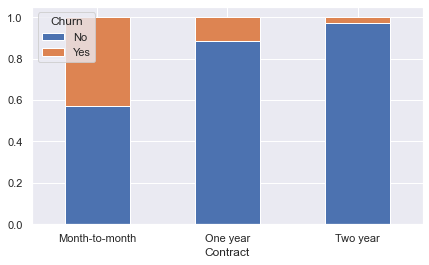

In [204]:
CrosstabResult = pd.crosstab(index = df_churn["Contract"], columns = df_churn['Churn'],
                          normalize ='index')

CrosstabResult.plot.bar(figsize = (7,4),
                    rot=0, stacked=True)

print(CrosstabResult)

Churn                      No       Yes
StreamingTV                            
No                   0.664769  0.335231
No internet service  0.925950  0.074050
Yes                  0.699298  0.300702


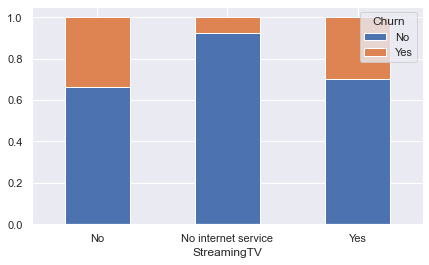

In [205]:
CrosstabResult = pd.crosstab(index = df_churn["StreamingTV"], columns = df_churn['Churn'],
                          normalize ='index')

CrosstabResult.plot.bar(figsize = (7,4),
                    rot=0, stacked=True)

print(CrosstabResult)

Churn                   No       Yes
PaperlessBilling                    
No                0.836699  0.163301
Yes               0.664349  0.335651


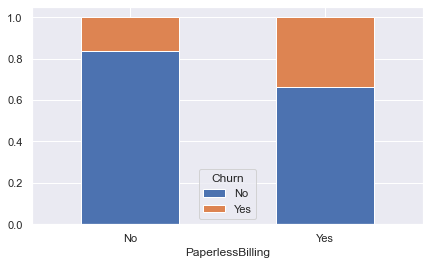

In [206]:
CrosstabResult = pd.crosstab(index = df_churn["PaperlessBilling"], columns = df_churn['Churn'],
                          normalize ='index')

CrosstabResult.plot.bar(figsize = (7,4),
                    rot=0, stacked=True)

print(CrosstabResult)

Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067


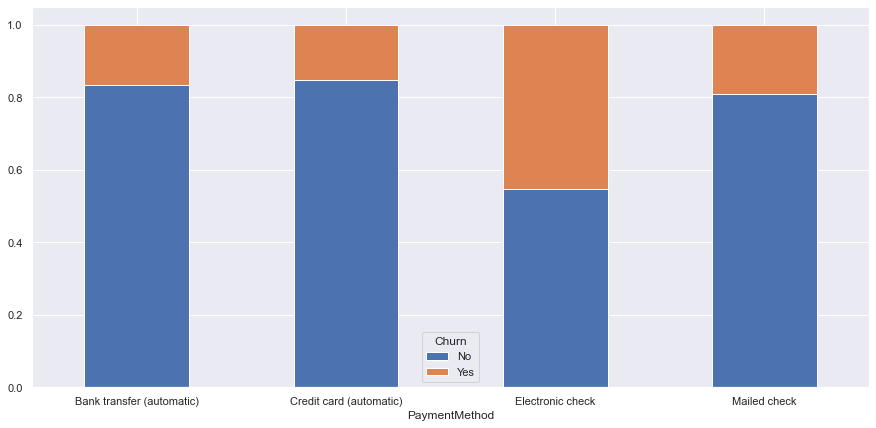

In [207]:
CrosstabResult = pd.crosstab(index = df_churn["PaymentMethod"], columns = df_churn['Churn'],
                          normalize ='index')

CrosstabResult.plot.bar(figsize = (15,7),
                    rot=0, stacked=True)

print(CrosstabResult)

### Observations:

### Demographic 
**'Gender'** has the same % of churn among customers (23%)

**'SeniorCitizen'** if the customer who are young citizen have 41% of churn 

**'Partner'** if the customer without partner have 32% of churn rather than with partner

**'Dependents'** if the customer with no dependentses have 31% of churn 

The gender does not bring any diferense in service cancelation as it has the same rate of churn. It won't be essential feature for us. SeniorCitizen will be taken inot concederation as it has high number of churn among young generation. features partner and dependendens are very controvercial as they are giving oposite informatiom. Custoners who have partners more likly to stay rather than single, however people with dependents (+chaild for examle) more likely to stay rather than people with no dependents.   

### Servises

**'PhoneService'** has 23% of churn for customers with or without the service

**'MultipleLines'** has 25-28% churn in all the servises provided

**'InternetService'** has high % of churn in fiber optic servise (41%)
The reason could be that Fiber more expensive than DSL. So the customers might simply switch Fiber to DSL

**'OnlineSecurity'** has very high % of churn in No Service (41%) to compare othere servises

**'OnlineBackup'** has high % of churn with No OnlineBackup servise (39%) among othere servises

**'DeviceProtection'** has high % in No DeviceProtection (39%) in comporation to othere services

**'TechSupport'** has high % of churn in No Tech Support (40%) amoung othere servises

**'StreamingMovies'** has high % of churn with customers who do not have the service(33%) in comparation to other servises

**'StreamingMovies'** has aproxiamatli the same % of churn (30-33%) in the servise provided and without the service



### Payments and contracts

**'Contract'** has high % of churn with month to month contract (42%) 

**'PaperlessBilling'** has 33% of churn with customers who have the servise to comper who do not

**'PaymentMethod'** has a high % of churn with customers who use Electronic check (45%) to compare to othere servises.

 We can see as longer the customers using the porduct they more likely to be loyal to the company. 

### Spliting categorical and numerical data


In [212]:
categorical_variables = ['SeniorCitizen', 'Partner', 'Dependents',
       'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [211]:
categorical_variables

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

### Incode of categorical Features

['tenure', 'MonthlyCharges', 'TotalCharges']